# LB 01: Первичный анализ данных

<div style="text-align: right"> ПСА 5 (Введение в машинное обучение). Мехмат, БГУ</div>
    
<div style="text-align: right"> Тишуров Алексей, 2021 </div>

Данный материал использует лицензию [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) со всеми вытекающими. На прилагаемый к материалу датасет лицензия не распостраняется. 

Цель первой лабораторной работы в том, чтобы вы познакомились с некоторыми инструментами курса(если еще не были знакомы) и научились проводить первичный анализ данных с помощью pandas. Лаба в некоторой степени имитирует погружение в предметную область, которое является неотъемлемой частью работы DS. Если вы читаете эти строки, то вы уже прошли подготовку: настроили себе окружение, тем самым выполнив половину работы. Сама лаба является комплементарной к лекции. Вам предлагается пройти туториал по пакету pandas. В будущем по курсу нам также будет полезен numpy, оставляю ссылку и на него. Для выполнения текущей лабораторной хватит первого (от ODS) и/или туториалов из официальной документации.

- Первичный анализ данных от ODS https://habr.com/company/ods/blog/322626/
- Туториал по pandas от Kaggle https://www.kaggle.com/learn/pandas
- Туториал по python и numpy https://cs231n.github.io/python-numpy-tutorial/
- Собственные туториалы pandas. Например, [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) содержит очень много полезной информации.


В рамках работы вы будете анализировать набор данных 'sleep_data.csv', состоящий из ежедневных измерений некоторым трекером сна. В этом датасете вы найдете следующие столбцы:

- date - дата наблюдения;
- sleep_score - комплексная оценка качества сна;
- total_bedtime - общее время, проведенное в кровати;
- total_sleep_time - время реального сна;
- awake_time - время бодрствования в кровати (например, случайные пробуждения, долгое засыпание и т.д.);
- rem_sleep_time - время REM-сна;
- light_sleep_time - время поверхностного сна;
- deep_sleep_time - время глубокого сна;
- sleep_efficiency - эффективность сна, т.е. время реального сна / общее время, проведенное в кровати;
- speep_latency - время на засыпание;
- bedtime_start - время отбоя;
- bedtime_end - время подъема;
- average_rhr - средний пульс во время отдыха (resting heart rate);
- lowest_rhr - минимальный пульс;
- average_hrv - средняя вариабельность частоты сердечных сокращений (heart rate variability);
- respiratory_rate - число вдохов в минуту;
- activity_score - комплексная оценка активности;
- steps - число шагов, но нужно держать в уме, что трекер мог сниматься днем, либо на часть дня.

Замечания:

 - Все время указано в секундах;
 - sleep_score, activity_score - от 0 до 100;
 - bedtime_start и bedtime_end - ISO timestamp.
 - Трекер сна имеет свою погрешность и не может соревноваться с полисомнографией, поэтому в данных есть шум и ошибки.



Сама лаба заключается в получении ответов на следующие вопросы по данным (**максимальная оценка 9**):
1. Какое среднее время сна? + Построить график изменения времени сна от 1 октября до 1 мая. 
2. Как зависит общее время сна от дня недели? + Построить barplot для демонстрации.
3. Найти top-3 пары колонок с самой высокой корреляцией. + Нарисовать их scatter_plot.
4. Существует утверждение, что время глубокого сна зависит от времени отхода ко сну: чем раньше, тем больше. Проверить, верно ли утверждение для **этого** датасета целиком и по месяцам.
5. А теперь проверить, есть ли такая зависимость между **долей** глубокого сна и временем отбоя. Сравнить результат. 
6. Узнать, как связаны среднее время сна и средняя активность (число шагов) за предыдущие 3 дня.
7. Сколько дней за период наблюдений пропущены в датасете?
8. Зависит ли эффективность сна от времени года?
9. Верно ли, что в выходные сон лучше?
10. Показать, как связаны показатели пульса и доли различных фаз сна.


Для получения **оценки 10** вам нужно придумать и реализовать какую-то свою дополнительную аналитику. Например, с помощью столбцов, не использованных ранее. ПРИМЕРЫ У РАЗНЫХ СТУДЕНТОВ ДОЛЖНЫ БЫТЬ РАЗНЫМИ. Но я готов поверить в **небольшое** количество случайных совпадений. 


Советы:
1. Если вам нужна какая-то новая величина для аналитики, то просто создайте новый столбец с ней. Например, вычислите долю глубого сна как df['deep_sleep_ratio'] = df['deep_sleep_time'] / df['total_sleep_time']. И пользуйтесь на здоровье.
2. Привести даты в удобный для работы формат можно с помощью pd.to_datetime. Дальше к стоблцу можно обращаться с помощью dt и получать нужные часы, минуты, дни недели и т.д. Например, вычисление минут после полуночи до времени сна: df['bedtime_start'].dt.hour * 60 + df['bedtime_start'].dt.minute. ВНИМАНИЕ! Последнее верно, только если каждое время отбоя позже полуночи.
3. Построение графиков удобно делать напрямую через DataFrame. Например, df.plot.scatter('sleep_score', 'activity_score'). Иногда может быть удобно вызвать график у конкретного столбца. Например, df['average_rhr'].hist(bins=20). Кому-то удобнее будет пользоватся matplotlib или любой другой библиотекой(если вдруг у вас есть опыт). Графики в matplotlib можно сделать визуально поприятнее при помощи seaborn.
4. Еще полезные методы:
   - groupby для вычисления статистик по группам https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
   - plot для рисования https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
   - df.describe, df.corr
   - df[column].rolling() - для вычисления скользящих статистик за период. Будет полезно в вопросе №6.

# Чтение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('sleep_data.csv')

In [3]:
df.head()

,date,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,sleep_efficiency,speep_latency,bedtime_start,bedtime_end,average_rhr,lowest_rhr,average_hrv,respiratory_rate,activity_score,steps
0,2019-09-21,79.0,39300.0,32850.0,6450.0,5610.0,19650.0,7590.0,84.0,480.0,2019-09-21T01:03:57+03:00,2019-09-21T11:58:57+03:00,68.750,55.0,47.0,17.000,83.0,3123.0
1,2019-09-22,59.0,29460.0,23850.0,5610.0,1770.0,17400.0,4680.0,81.0,390.0,2019-09-22T02:25:38+03:00,2019-09-22T10:36:38+03:00,58.000,50.0,59.0,16.625,84.0,11001.0
2,2019-09-23,60.0,24720.0,20550.0,4170.0,1320.0,12870.0,6360.0,83.0,870.0,2019-09-23T02:02:10+03:00,2019-09-23T08:54:10+03:00,57.750,51.0,52.0,17.125,84.0,9430.0
3,2019-09-24,67.0,26700.0,24120.0,2580.0,2490.0,15000.0,6630.0,90.0,600.0,2019-09-24T01:34:15+03:00,2019-09-24T08:59:15+03:00,60.250,52.0,61.0,16.750,79.0,8662.0
4,2019-09-25,58.0,28140.0,21780.0,6360.0,1680.0,14040.0,6060.0,77.0,1080.0,2019-09-25T01:35:48+03:00,2019-09-25T09:24:48+03:00,61.875,53.0,55.0,17.125,81.0,11867.0


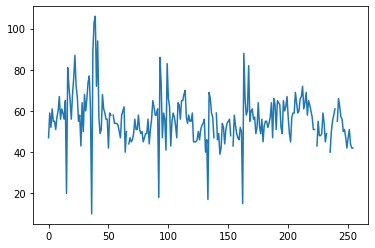

In [4]:
df.average_hrv.plot()

# Выполнение заданий

# Задание 1
# Какое среднее время сна? + Построить график изменения времени сна от 1 октября до 1 мая.

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['bedtime_start'] = pd.to_datetime(df['bedtime_start']).dt.tz_localize(None)
df['bedtime_end'] = pd.to_datetime(df['bedtime_end']).dt.tz_localize(None)

In [6]:
df.insert(loc=df.columns.get_loc('bedtime_end') + 1, 
         column='bedtime_last', 
         value=(df['bedtime_end'] - df['bedtime_start']))

In [7]:
delta = int(df['total_sleep_time'].mean())
print('The average last of sleep is {:02d}:{:02d}:{:02d}'.format(delta // 3600, 
                                                                delta % 3600 // 60,
                                                                delta % 60))

The average last of sleep is 06:40:24


In [8]:
sleep_last = df.loc[(df['date'] >= pd.datetime(2019, 10, 1)) & (df['date'] < pd.datetime(2020, 5, 1))].loc[:, ['date', 'total_sleep_time']]

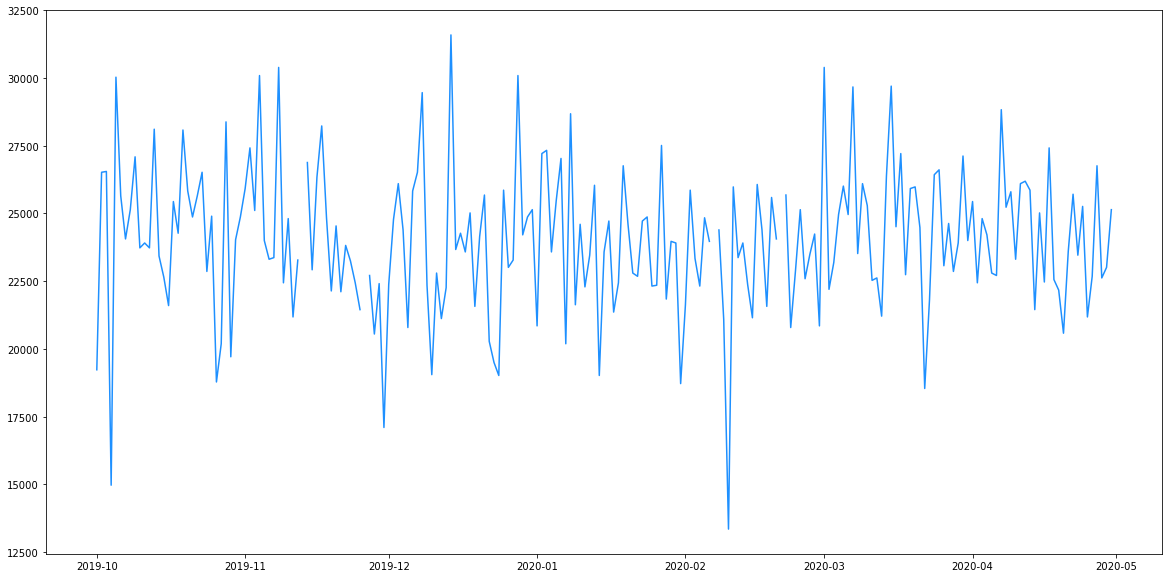

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(sleep_last['date'], sleep_last['total_sleep_time'], color='dodgerblue')
plt.show()

In [10]:
df['total_sleep_time'].isna().sum()

8

In [11]:
df[df['total_sleep_time'].isna()]

,date,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,sleep_efficiency,speep_latency,bedtime_start,bedtime_end,bedtime_last,average_rhr,lowest_rhr,average_hrv,respiratory_rate,activity_score,steps
53,2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,93.0,5835.0
66,2019-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,74.0,9553.0
139,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,78.0,7333.0
153,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,91.0,9188.0
223,2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,74.0,6320.0
233,2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,67.0,5913.0
234,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,63.0,32.0
240,2020-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,80.0,6957.0


# Задание 2
# Как зависит общее время сна от дня недели? + Построить barplot для демонстрации.

In [14]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [15]:
mean_time_in_seconds = df.groupby(pd.Categorical(df['date'].dt.day_name(), 
                                categories=days_of_week, ordered=True))['total_sleep_time'].mean()

In [16]:
pd.to_datetime(mean_time_in_seconds, unit='s').dt.strftime('%H:%M:%S')

Monday       06:39:56
Tuesday      06:28:15
Wednesday    06:45:18
Thursday     06:39:51
Friday       06:32:09
Saturday     06:50:35
Sunday       06:45:10
Name: total_sleep_time, dtype: object

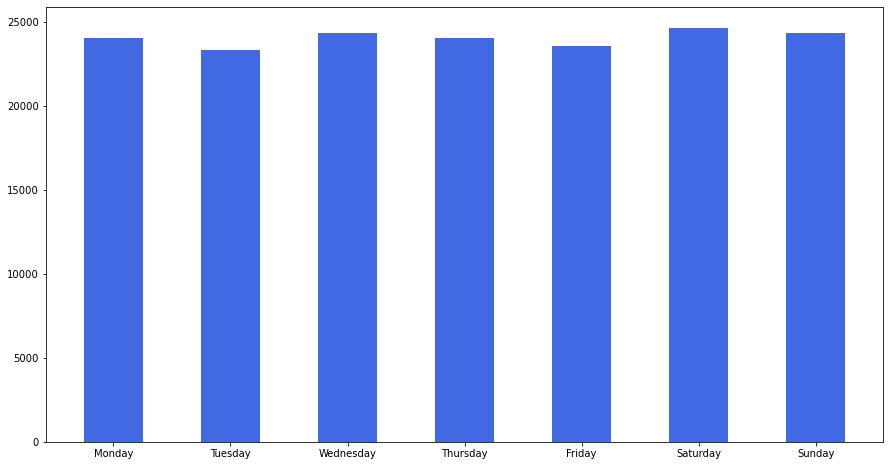

In [17]:
plt.figure(figsize=(15, 8))
plt.bar(days_of_week, mean_time_in_seconds, width=0.5, color='royalblue')
plt.show()

# Задание 3
# Найти top-3 пары колонок с самой высокой корреляцией. + Нарисовать их scatter_plot.

In [18]:
corr_pairs = df.corr().abs().unstack().sort_values(ascending=False)[::2]

In [19]:
corr_pairs.loc[corr_pairs < 1][:3]

average_rhr       lowest_rhr          0.887952
sleep_efficiency  awake_time          0.886984
sleep_score       total_sleep_time    0.858582
dtype: float64

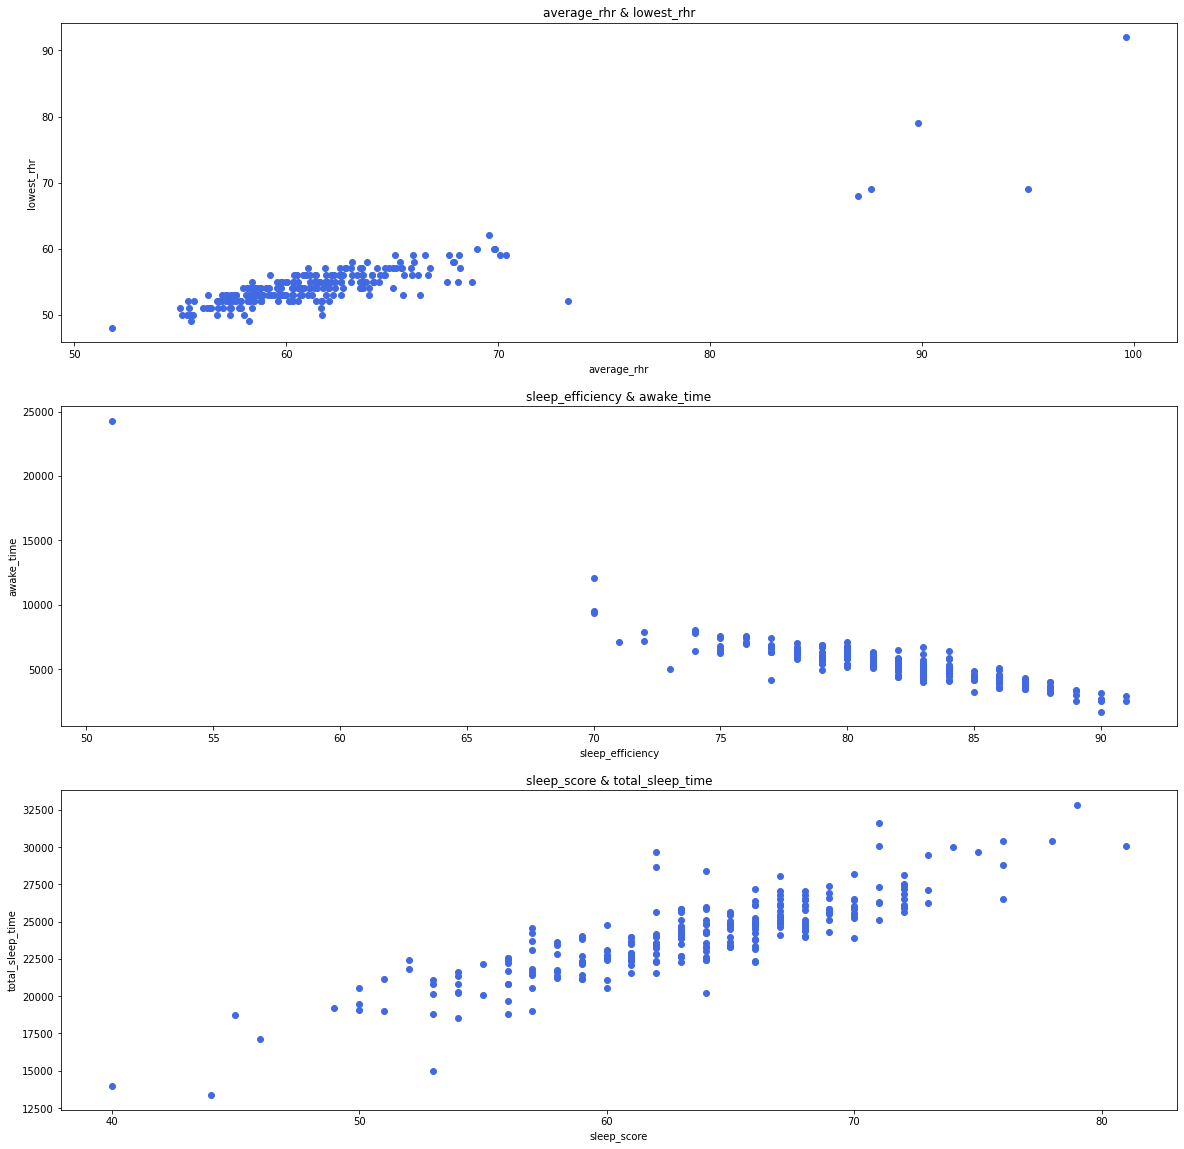

In [20]:
fig, pairs = plt.subplots(3, 1)

pairs[0].set_title('average_rhr & lowest_rhr')
pairs[0].set_xlabel('average_rhr')
pairs[0].set_ylabel('lowest_rhr')
pairs[0].scatter(df['average_rhr'], df['lowest_rhr'], color='royalblue')

pairs[1].set_title('sleep_efficiency & awake_time')
pairs[1].set_xlabel('sleep_efficiency')
pairs[1].set_ylabel('awake_time')
pairs[1].scatter(df['sleep_efficiency'], df['awake_time'], color='royalblue')

pairs[2].set_title('sleep_score & total_sleep_time')
pairs[2].set_xlabel('sleep_score')
pairs[2].set_ylabel('total_sleep_time')
pairs[2].scatter(df['sleep_score'], df['total_sleep_time'], color='royalblue')

fig.set_figwidth(20)
fig.set_figheight(20)
plt.show()

# Задание 4
# Существует утверждение, что время глубокого сна зависит от времени отхода ко сну: чем раньше, тем больше. Проверить, верно ли утверждение для этого датасета целиком и по месяцам.

In [21]:
def datetime_to_seconds(date_to_convert):
    converted = date_to_convert.hour * 3600 + \
                date_to_convert.minute * 60 + \
                date_to_convert.second
    
    if date_to_convert.hour > 20:
        return converted
    else:
        return converted + 24 * 3600

In [22]:
df.insert(loc=df.columns.get_loc('bedtime_start') - 1, 
         column='start_sleep_corr_index', 
         value=df['bedtime_start'].map(lambda x: datetime_to_seconds(x)))

## Целиком

In [23]:
df.loc[:, ['deep_sleep_time', 'start_sleep_corr_index']].corr()

,deep_sleep_time,start_sleep_corr_index
deep_sleep_time,1.000000,-0.088218
start_sleep_corr_index,-0.088218,1.000000


Корреляция небольшая. Учитывая разброс времени, когда человек ложился спать (с 21 до 3), можно сделать вывод, что эти два признака не сильно коррелируют.

In [24]:
def caluculateCorr(year, month, *, first_col, second_col):
    end_month = 1 if month == 12 else month + 1
    end_year = year + 1 if month == 12 else year
    
    return df.loc[(df['date'] >= pd.datetime(year, month, 1)) & (df['date'] < pd.datetime(end_year, end_month, 1)), 
            [first_col, second_col]].corr()

## По месяцам

In [25]:
timerange = pd.period_range(start=df.iloc[0]['date'], end=df.iloc[-1]['date'], freq='M')

In [27]:
for key_date in timerange:
    print('{}-{}\n{}\n'.format(key_date.year, key_date.month, caluculateCorr(key_date.year, key_date.month, 
                                                                            first_col='deep_sleep_time',
                                                                            second_col='start_sleep_corr_index')))

2019-9
                        deep_sleep_time  start_sleep_corr_index
deep_sleep_time                1.000000               -0.564339
start_sleep_corr_index        -0.564339                1.000000

2019-10
                        deep_sleep_time  start_sleep_corr_index
deep_sleep_time                1.000000               -0.029565
start_sleep_corr_index        -0.029565                1.000000

2019-11
                        deep_sleep_time  start_sleep_corr_index
deep_sleep_time                1.000000               -0.385085
start_sleep_corr_index        -0.385085                1.000000

2019-12
                        deep_sleep_time  start_sleep_corr_index
deep_sleep_time                1.000000               -0.383398
start_sleep_corr_index        -0.383398                1.000000

2020-1
                        deep_sleep_time  start_sleep_corr_index
deep_sleep_time                1.000000               -0.019109
start_sleep_corr_index        -0.019109                1.00000

Однако корреляция по некоторым месяцам местами странная.

# Задание 5
# А теперь проверить, есть ли такая зависимость между долей глубокого сна и временем отбоя. Сравнить результат.

In [28]:
 df['deep_sleep_ratio'] = df['deep_sleep_time'] / df['total_sleep_time']

## Целиком

In [29]:
df.loc[:, ['deep_sleep_ratio', 'start_sleep_corr_index']].corr()

,deep_sleep_ratio,start_sleep_corr_index
deep_sleep_ratio,1.000000,0.168594
start_sleep_corr_index,0.168594,1.000000


## По месяцам

In [30]:
for key_date in timerange:
    print('{}-{}\n{}\n'.format(key_date.year, key_date.month, caluculateCorr(key_date.year, key_date.month, 
                                                                            first_col='deep_sleep_ratio',
                                                                            second_col='start_sleep_corr_index')))

2019-9
                        deep_sleep_ratio  start_sleep_corr_index
deep_sleep_ratio                1.000000                0.131257
start_sleep_corr_index          0.131257                1.000000

2019-10
                        deep_sleep_ratio  start_sleep_corr_index
deep_sleep_ratio                1.000000                0.416042
start_sleep_corr_index          0.416042                1.000000

2019-11
                        deep_sleep_ratio  start_sleep_corr_index
deep_sleep_ratio                1.000000               -0.085455
start_sleep_corr_index         -0.085455                1.000000

2019-12
                        deep_sleep_ratio  start_sleep_corr_index
deep_sleep_ratio                1.000000               -0.121475
start_sleep_corr_index         -0.121475                1.000000

2020-1
                        deep_sleep_ratio  start_sleep_corr_index
deep_sleep_ratio                1.000000                0.258132
start_sleep_corr_index          0.258132        

Опять же по месяцам почему-то корреляция была сильно неравномерная (в частности, для первого и последнего месяцев это обусловлено малым количеством дней).

# Задание 6
# Узнать, как связаны среднее время сна и средняя активность (число шагов) за предыдущие 3 дня.

In [31]:
df.insert(loc=df.columns.get_loc('bedtime_last') + 1,
          column='bedtime_last_in_sec',
          value=(df['bedtime_end'] - df['bedtime_start']).dt.seconds)

In [32]:
df.loc[0:, ['steps', 'bedtime_last_in_sec']].rolling(window=3).mean()[2:].corr()

,steps,bedtime_last_in_sec
steps,1.000000,-0.186831
bedtime_last_in_sec,-0.186831,1.000000


Так как значение корреляции получилось отрицательное, значит чем больше шагов делает человек за день, тем меньше длится сон у него (но незначительно).

# Задание 7
# Сколько дней за период наблюдений пропущены в датасете?

In [33]:
(df.isnull().sum(axis=1) > 0).sum()

9

In [34]:
df.loc[df.isnull().sum(axis=1) > 0]

,date,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,sleep_efficiency,start_sleep_corr_index,...,bedtime_end,bedtime_last,bedtime_last_in_sec,average_rhr,lowest_rhr,average_hrv,respiratory_rate,activity_score,steps,deep_sleep_ratio
53,2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,93.0,5835.0,NaN
65,2019-11-25,59.0,27180.0,21450.0,5730.0,1440.0,14550.0,5460.0,79.0,91141.0,...,2019-11-25 08:52:01,07:33:00,27180.0,57.18,53.0,50.0,17.0,NaN,NaN,0.254545
66,2019-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,74.0,9553.0,NaN
139,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,78.0,7333.0,NaN
153,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,91.0,9188.0,NaN
223,2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,74.0,6320.0,NaN
233,2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,67.0,5913.0,NaN
234,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,63.0,32.0,NaN
240,2020-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,80.0,6957.0,NaN


# Задание 8
# Зависит ли эффективность сна от времени года?

In [35]:
autumn_efficiency = df.loc[df['date'].dt.date < datetime.date(2019, 12, 1), 'sleep_efficiency'].mean()
winter_efficiency = df.loc[(df['date'].dt.date >= datetime.date(2019, 12, 1)) & 
                           (df['date'].dt.date < datetime.date(2020, 3, 1)), 'sleep_efficiency'].mean()
spring_efficiency = df.loc[(df['date'].dt.date >= datetime.date(2020, 3, 1)) & 
                           (df['date'].dt.date < datetime.date(2020, 6, 1)), 'sleep_efficiency'].mean()
summer_efficiency = df.loc[df['date'].dt.date >= datetime.date(2020, 6, 1), 'sleep_efficiency'].mean()

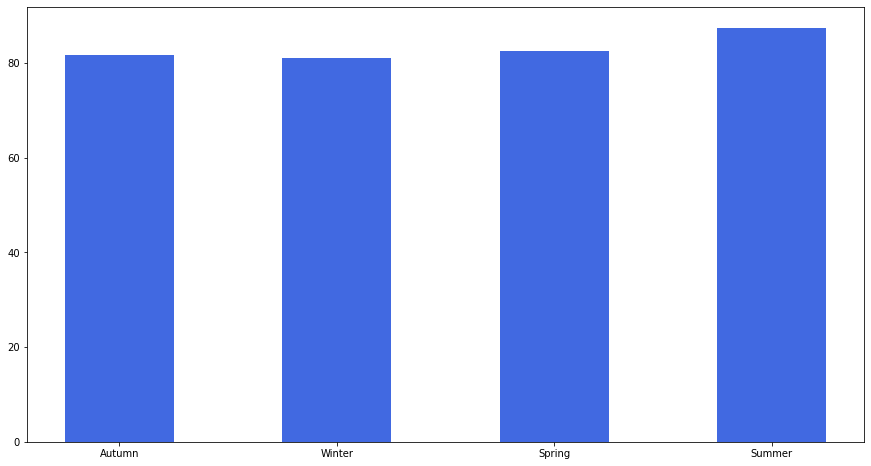

In [36]:
plt.figure(figsize=(15, 8))
x_axe = ['Autumn', 'Winter', 'Spring', 'Summer']
plt.bar(x_axe, [autumn_efficiency, winter_efficiency,
                spring_efficiency, summer_efficiency], width=0.5, color='royalblue')
plt.show()

# Задание 9
# Верно ли, что в выходные сон лучше?

In [37]:
weekdays_stat = df.loc[df['date'].dt.dayofweek < 5, 'sleep_score'].value_counts().sort_index(ascending=False)
weekends_stat = df.loc[df['date'].dt.dayofweek >= 5, 'sleep_score'].value_counts().sort_index(ascending=False)

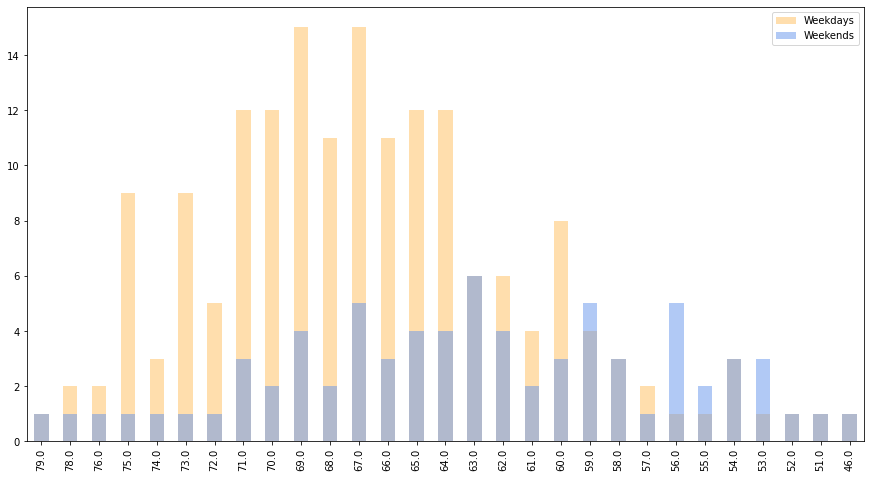

In [38]:
weekdays_stat.plot(kind='bar', figsize=(15, 8), color='navajowhite', alpha=1)
weekends_stat.plot(kind='bar', figsize=(15, 8), color='cornflowerblue', alpha=0.5)
plt.legend(['Weekdays', 'Weekends'])
plt.show()

In [39]:
weekdays_mean = df.loc[df['date'].dt.dayofweek < 5, 'sleep_score'].mean()
weekends_mean = df.loc[df['date'].dt.dayofweek >= 5, 'sleep_score'].mean()

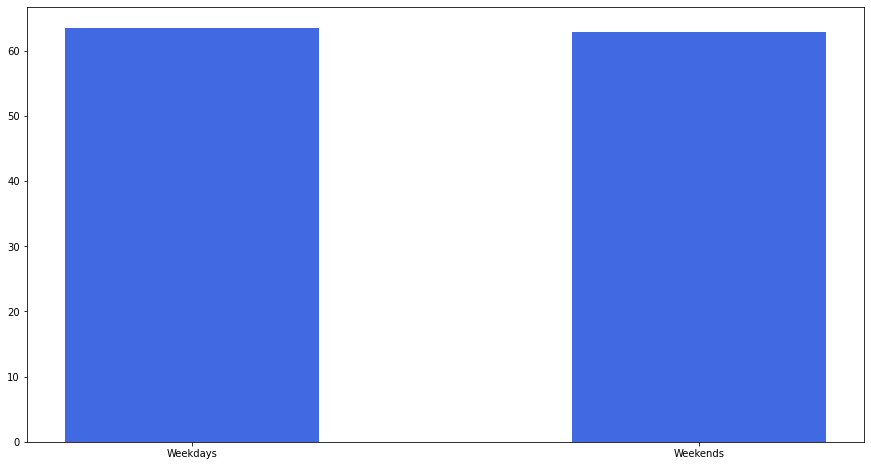

In [40]:
plt.figure(figsize=(15, 8))
x_axe = ['Weekdays', 'Weekends']
plt.bar(x_axe, [weekdays_mean, weekends_mean], width=0.5, color='royalblue')
plt.show()

In [41]:
weekdays_mean, weekends_mean

(63.54913294797688, 62.9054054054054)

# Задание 10
# Показать, как связаны показатели пульса и доли различных фаз сна.

In [42]:
df['light_sleep_ratio'] = df['light_sleep_time'] / df['total_sleep_time']

In [43]:
df.loc[:, ['lowest_rhr', 'light_sleep_ratio']].corr()

,lowest_rhr,light_sleep_ratio
lowest_rhr,1.000000,-0.087142
light_sleep_ratio,-0.087142,1.000000


In [44]:
df.loc[:, ['lowest_rhr', 'deep_sleep_ratio']].corr()

,lowest_rhr,deep_sleep_ratio
lowest_rhr,1.000000,-0.175413
deep_sleep_ratio,-0.175413,1.000000


Отсюда можно сделать вывод, что пульс и доля различных фаз сна слабо коррелируют. Однако, можно сделать вывод, что чем дольше будет длиться фаза глубокого сна, тем спокойнее будет пульс. Ровным счетом, как и при фазе неглубокого сна, но не так ярковыраженно.

## Доп

In [45]:
df.loc[:, ['speep_latency', 'activity_score']].corr()

,speep_latency,activity_score
speep_latency,1.000000,0.015047
activity_score,0.015047,1.000000
